In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from os import path
import platform
import zipfile
import os

In [2]:
system = platform.system()

def get_real_path(link_path):
    if system == "Windows":
        import win32com.client
        shell = win32com.client.Dispatch("WScript.Shell")
        return str(shell.CreateShortCut(link_path).Targetpath)
    else:
        return path.realpath(link_path)


In [3]:
def total_to_per_persona(total_df, personas_counts_df, scenarios, index):
    result = total_df.copy(deep=True)
    for persona in index:
        for scenario in scenarios:
            if personas_counts_df.loc[persona][scenario] == 0:
                result.loc[persona][scenario] = 0
            else:
                old_value = total_df.loc[persona][scenario]
                nb = personas_counts_df.loc[persona][scenario]
                new_value = old_value / nb
                result.loc[persona, scenario] = new_value
    return result

In [4]:
inputs_path = get_real_path("data/raw/inputs")
outputs_path = get_real_path("data/raw/outputs")

In [57]:
scenarios = ["s{}".format(i) for i in range(5)]

persons_csv_paths = {s: path.join(inputs_path, "idf_{}_persons.csv".format(s)) for s in scenarios}

# The paths below should point to directories
scenarios_outputs_folder_names = {"s0": "s0", 
                                  "s1": "s1",
                                  "s2": "s2",
                                  "s3": "s3",
                                  "s4": "s4"
                                 }

scenarios_outputs = {s: path.join(outputs_path, 
                    scenarios_outputs_folder_names[s]) for s in scenarios}
persons = dict()
for s in scenarios:
    persons[s] = pd.read_csv(persons_csv_paths[s], sep=";")

In [11]:
pwd

'/Users/tjark/Documents/Python/simulation-analysis.nosync'

In [6]:
personas = set()
for s in scenarios:
    personas.update(pd.unique(persons[s]["persona"].values.ravel()))

In [7]:
personas_counts = pd.DataFrame(index=list(personas), columns=scenarios)
for p in personas:
    for s in scenarios:
        try:
            personas_counts.loc[p][s] = persons[s]["persona"].value_counts()[p]
        except KeyError:
            personas_counts.loc[p][s] = 0
personas_counts.head()

,s0,s1,s2,s3,s4
1,3380,6645,6149,4983,6422
2,6404,5455,4733,1425,7343
3,7243,4864,6557,3799,7228
4,3923,2723,2439,2129,3331
5,4376,5637,4128,3638,4396


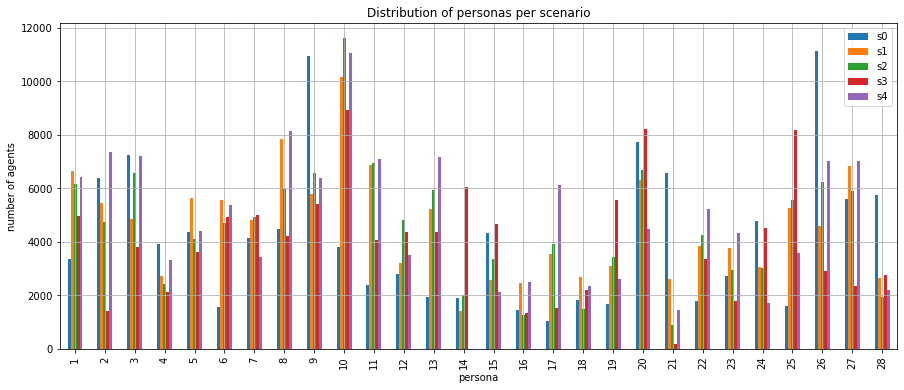

In [8]:
personas_counts.plot(kind="bar", grid=True, figsize=(15,6), title="Distribution of personas per scenario", xlabel="persona", ylabel="number of agents")
plt.show()

## Read csv files from zip file and save individually in folders

In [36]:
# create folders s0-s4 if not existing yet
s0_path = r'data/raw/outputs/s0' 
if not os.path.exists(s0_path):
    os.makedirs(s0_path)
s1_path = r'data/raw/outputs/s1' 
if not os.path.exists(s1_path):
    os.makedirs(s1_path)
s2_path = r'data/raw/outputs/s2' 
if not os.path.exists(s2_path):
    os.makedirs(s2_path)
s3_path = r'data/raw/outputs/s3' 
if not os.path.exists(s3_path):
    os.makedirs(s3_path)
s4_path = r'data/raw/outputs/s4' 
if not os.path.exists(s4_path):
    os.makedirs(s4_path)

In [87]:
# read and write files from zip to normal folder
with zipfile.ZipFile('data/raw/outputs/s0.zip', 'r') as zip_file:
    with zip_file.open('eqasim_trips.csv') as file:
        eqasim_trips = pd.read_csv(file, sep=";")
        eqasim_trips.to_csv('data/raw/outputs/s0/eqasim_trips.csv')
    with zip_file.open('eqasim_pt.csv') as file:
        eqasim_pt = pd.read_csv(file, sep=";")
        eqasim_pt.to_csv('data/raw/outputs/s0/eqasim_pt.csv')
    with zip_file.open('legs.csv') as file:
        eqasim_pt = pd.read_csv(file, sep=";")
        eqasim_pt.to_csv('data/raw/outputs/s0/legs.csv')

In [88]:
# read and write files from zip to normal folder
with zipfile.ZipFile('data/raw/outputs/s1.zip', 'r') as zip_file:
    with zip_file.open('eqasim_trips.csv') as file:
        eqasim_trips = pd.read_csv(file, sep=";")
        eqasim_trips.to_csv('data/raw/outputs/s1/eqasim_trips.csv')
    with zip_file.open('eqasim_pt.csv') as file:
        eqasim_pt = pd.read_csv(file, sep=";")
        eqasim_pt.to_csv('data/raw/outputs/s1/eqasim_pt.csv')
    with zip_file.open('legs.csv') as file:
        eqasim_pt = pd.read_csv(file, sep=";")
        eqasim_pt.to_csv('data/raw/outputs/s1/legs.csv')

In [89]:
# read and write files from zip to normal folder
with zipfile.ZipFile('data/raw/outputs/s2.zip', 'r') as zip_file:
    with zip_file.open('eqasim_trips.csv') as file:
        eqasim_trips = pd.read_csv(file, sep=";")
        eqasim_trips.to_csv('data/raw/outputs/s2/eqasim_trips.csv')
    with zip_file.open('eqasim_pt.csv') as file:
        eqasim_pt = pd.read_csv(file, sep=";")
        eqasim_pt.to_csv('data/raw/outputs/s2/eqasim_pt.csv')
    with zip_file.open('legs.csv') as file:
        eqasim_pt = pd.read_csv(file, sep=";")
        eqasim_pt.to_csv('data/raw/outputs/s2/legs.csv')

In [90]:
# read and write files from zip to normal folder
with zipfile.ZipFile('data/raw/outputs/s3.zip', 'r') as zip_file:
    with zip_file.open('eqasim_trips.csv') as file:
        eqasim_trips = pd.read_csv(file, sep=";")
        eqasim_trips.to_csv('data/raw/outputs/s3/eqasim_trips.csv')
    with zip_file.open('eqasim_pt.csv') as file:
        eqasim_pt = pd.read_csv(file, sep=";")
        eqasim_pt.to_csv('data/raw/outputs/s3/eqasim_pt.csv')
    with zip_file.open('legs.csv') as file:
        eqasim_pt = pd.read_csv(file, sep=";")
        eqasim_pt.to_csv('data/raw/outputs/s3/legs.csv')

In [91]:
# read and write files from zip to normal folder
with zipfile.ZipFile('data/raw/outputs/s4.zip', 'r') as zip_file:
    with zip_file.open('eqasim_trips.csv') as file:
        eqasim_trips = pd.read_csv(file, sep=";")
        eqasim_trips.to_csv('data/raw/outputs/s4/eqasim_trips.csv')
    with zip_file.open('eqasim_pt.csv') as file:
        eqasim_pt = pd.read_csv(file, sep=";")
        eqasim_pt.to_csv('data/raw/outputs/s4/eqasim_pt.csv')
    with zip_file.open('legs.csv') as file:
        eqasim_pt = pd.read_csv(file, sep=";")
        eqasim_pt.to_csv('data/raw/outputs/s4/legs.csv')

In [47]:
s0_eqasim_pt.head()

,person_id,person_trip_id,leg_index,access_stop_id,egress_stop_id,transit_line_id,transit_route_id,access_area_id,egress_area_id,transit_mode
0,1271150,0,1,StopPoint:59:7376180.link:48983,StopPoint:59:4036986.link:585002,100987783:N14,116443104-1_183707,StopArea:59631,StopArea:59566,bus
1,944660,0,1,StopPoint:8743315:800:N141.link:554571,StopPoint:8759118:800:N141.link:481468,800:N141,117422208-1_22633,StopArea:59435,StopArea:8711300,bus
2,10502677,0,1,StopPoint:59:5150728.link:506840,StopPoint:59:6783435.link:148459,100987753:N51,116441814-1_188349,StopArea:59912,StopArea:8727114,bus
3,6365356,0,1,StopPoint:59:4016027.link:456736,StopPoint:59:7991680.link:574981,100987782:N15,116428873-1_183751,StopArea:59:4016026,StopArea:8738400,bus
4,7081458,0,1,StopPoint:59:7275530.link:239769,StopPoint:59:4459238.link:646069,100987752:N52,116959084-1_188375,StopArea:59:7275530,StopArea:59443,bus


In [59]:
eqasim_trips.head()

,person_id,person_trip_id,origin_x,origin_y,destination_x,destination_y,departure_time,travel_time,vehicle_distance,routed_distance,mode,preceding_purpose,following_purpose,returning,euclidean_distance,origin_scope,destination_scope,trip_scope
0,3369357,0,683801.445925,6.848393e+06,683801.445925,6.848393e+06,12828.0,0.0,0.000000,0.000000,car,work,work,False,0.000000,inside,NaN,inside
1,9031997,0,650724.060087,6.861789e+06,650724.060087,6.861789e+06,13076.0,0.0,0.000000,0.000000,walk,work,work,False,0.000000,inside,NaN,inside
2,12340762,0,663360.418141,6.875824e+06,663360.418141,6.875824e+06,13253.0,0.0,0.000000,0.000000,car,work,work,False,0.000000,inside,NaN,inside
3,900188,0,651582.293041,6.865473e+06,652351.803300,6.866176e+06,13057.0,283.0,1620.174081,1620.174081,car,home,work,False,1042.570966,inside,NaN,inside
4,10091737,0,659276.592831,6.861554e+06,658880.780231,6.861891e+06,12786.0,569.0,0.000000,683.405979,walk,home,work,False,519.976090,inside,NaN,inside


In [61]:
trips_dfs = dict()
for s in scenarios:
    base_trips = pd.read_csv(path.join(scenarios_outputs[s], "eqasim_trips.csv"), sep=",")
    clustered_trips = base_trips.merge(persons[s][["person_id", "persona"]], on="person_id", how="inner")
    assert len(clustered_trips) == len(base_trips)
    trips_dfs[s] = clustered_trips

In [60]:
base_trips.head()

,",person_id,person_trip_id,origin_x,origin_y,destination_x,destination_y,departure_time,travel_time,vehicle_distance,routed_distance,mode,preceding_purpose,following_purpose,returning,euclidean_distance,origin_scope,destination_scope,trip_scope"
0,"0,3927147,0,605885.1575946903,6876583.55447425..."
1,"1,2532319,0,664639.6980047227,6861509.71678390..."
2,"2,11230911,0,646478.8287255577,6870087.6890097..."
3,"3,2226942,0,666156.5435906649,6826269.19313263..."
4,"4,10928076,0,635914.8346122707,6878041.2013432..."


In [62]:
trips_dfs["s0"].head()

,Unnamed: 0,person_id,person_trip_id,origin_x,origin_y,destination_x,destination_y,departure_time,travel_time,vehicle_distance,routed_distance,mode,preceding_purpose,following_purpose,returning,euclidean_distance,origin_scope,destination_scope,trip_scope,persona
0,0,3927147,0,605885.157595,6.876584e+06,605885.157595,6.876584e+06,12757.0,0.0,0.000000,0.000000,walk,work,work,False,0.000000,inside,NaN,inside,28
1,4423,3927147,1,605885.157595,6.876584e+06,606622.636756,6.876086e+06,23557.0,924.0,0.000000,1109.117392,walk,work,home,True,889.806959,inside,NaN,inside,28
2,87860,3927147,2,606622.636756,6.876086e+06,632624.482358,6.867061e+06,34357.0,2764.0,31261.047193,31261.047193,car,home,other,False,27523.352085,inside,NaN,inside,28
3,133950,3927147,3,632624.482358,6.867061e+06,606622.636756,6.876086e+06,41557.0,2173.0,31629.733169,31629.733169,car,other,home,True,27523.352085,inside,NaN,inside,28
4,255286,3927147,4,606622.636756,6.876086e+06,601358.090381,6.877858e+06,59557.0,517.0,6621.651388,6621.651388,car,home,shop,False,5554.922888,inside,NaN,inside,28


In [63]:
modes = ["walk", "car", "pt", "bike", "car_passenger"]
modes_counts = {persona: pd.DataFrame(index=modes, columns=scenarios) for persona in personas}
for p in personas:
    for s in scenarios:
        df = trips_dfs[s]
        modes_counts[p][s] = df[df["persona"]==p]["mode"].value_counts()
modes_counts[1].head()

,s0,s1,s2,s3,s4
walk,5334,10213,9560,7877,9805
car,2951,5856,5194,4068,5468
pt,3154,6244,5880,4629,6193
bike,169,454,342,291,330
car_passenger,713,1257,1231,989,1323


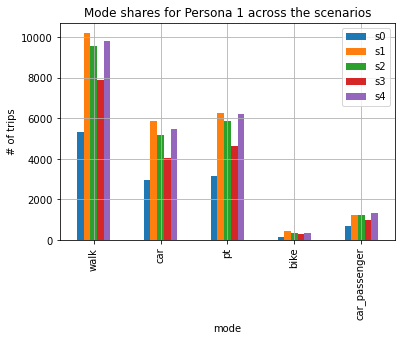

In [64]:
modes_counts[1].plot(kind="bar", grid=True, title="Mode shares for Persona 1 across the scenarios", xlabel="mode", ylabel="# of trips")
plt.show()

In [68]:
modes_counts = pd.DataFrame(index=list(personas), columns=modes)

In [69]:
for p in personas:
    df = trips_dfs["s0"][trips_dfs["s0"]["persona"]==p]
    modes_counts.loc[p] = df["mode"].value_counts()
modes_counts.head()

,walk,car,pt,bike,car_passenger
1,5334,2951,3154,169,713
2,8786,6728,3891,465,1688
3,9797,9280,3738,293,2133
4,5493,4837,2139,144,1042
5,6777,3844,4449,280,921


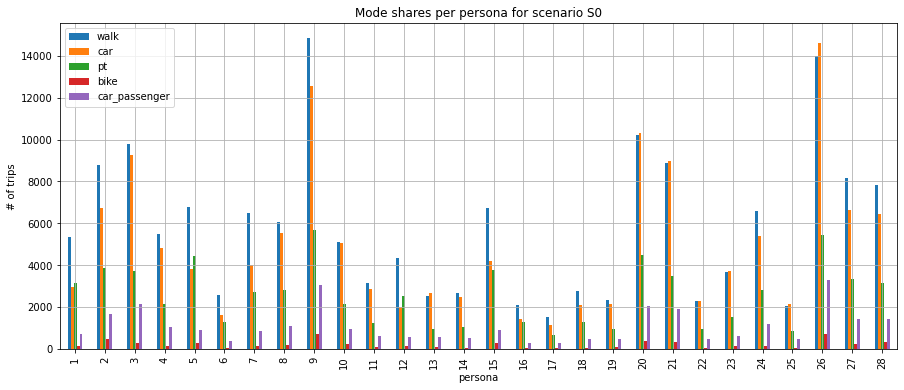

In [70]:
modes_counts.plot(kind="bar", grid=True, figsize=(15,6), ylabel="# of trips", xlabel="persona", title="Mode shares per persona for scenario S0")
plt.show()

In [71]:
modes_shares =  pd.DataFrame(index=list(personas), columns=modes)
for p in personas:
    df = trips_dfs["s0"][trips_dfs["s0"]["persona"]==p]
    modes_shares.loc[p] = df["mode"].value_counts() / len(df)
modes_shares.head()

,walk,car,pt,bike,car_passenger
1,0.432919,0.23951,0.255986,0.013716,0.057869
2,0.407552,0.312088,0.18049,0.02157,0.0783
3,0.388138,0.367656,0.148092,0.011608,0.084505
4,0.40227,0.354229,0.156646,0.010546,0.076309
5,0.416508,0.236249,0.273431,0.017209,0.056604


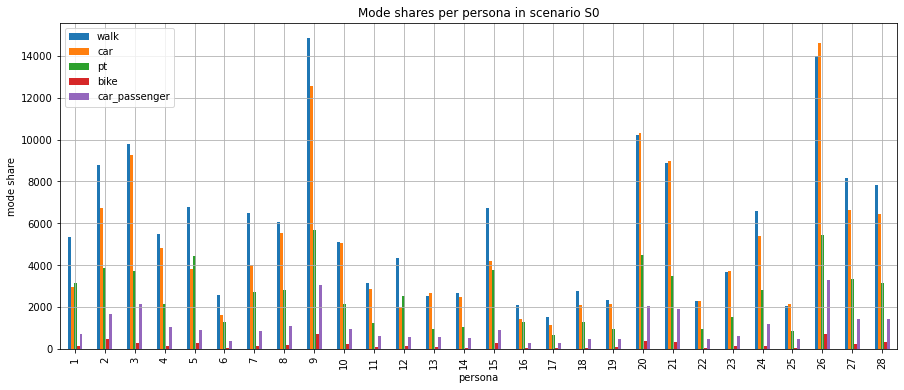

In [72]:
modes_counts.plot(kind="bar", grid=True, figsize=(15,6), title="Mode shares per persona in scenario S0", xlabel="persona", ylabel="mode share")
plt.show()

In [73]:
modes_counts = pd.DataFrame(index=scenarios, columns=modes)
for s in scenarios:
    modes_counts.loc[s] = trips_dfs[s]["mode"].value_counts()
modes_counts.head()

,walk,car,pt,bike,car_passenger
s0,163151,138091,71893,6095,30504
s1,181138,149610,80574,6798,34264
s2,177903,151019,78923,6614,33736
s3,158238,135628,69428,5596,28821
s4,185691,154476,83248,6845,35602


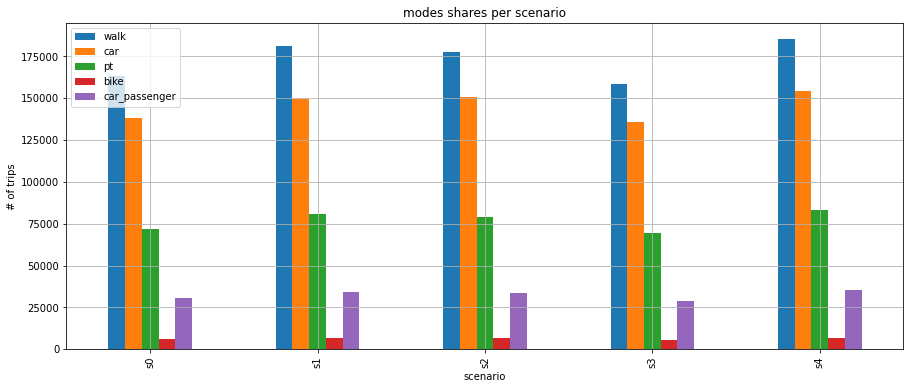

In [74]:
modes_counts.plot(kind="bar", title="modes shares per scenario", xlabel="scenario", ylabel="# of trips", figsize=(15,6), grid=True)
plt.show()

In [76]:
trips_counts = pd.DataFrame(index=list(personas), columns=scenarios)
for s in scenarios:
    trips_counts[s] = trips_dfs[s]["persona"].value_counts()
trips_counts.head()

,s0,s1,s2,s3,s4
1,12321,24024,22207,17854,23119.0
2,21558,17856,15543,4722,23823.0
3,25241,17226,22973,13312,25324.0
4,13655,9583,8362,7503,11299.0
5,16271,20742,14858,13141,15964.0


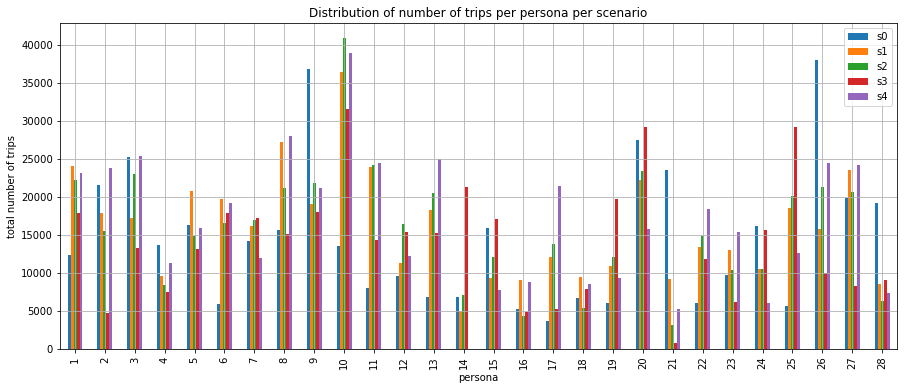

In [77]:
trips_counts.plot(kind="bar", figsize=(15,6), grid=True, title="Distribution of number of trips per persona per scenario", xlabel="persona", ylabel="total number of trips")
plt.show()

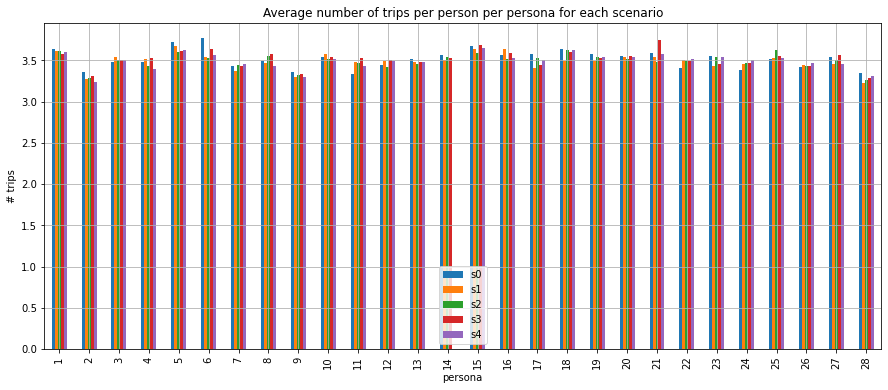

In [78]:
total_to_per_persona(trips_counts, personas_counts, scenarios, personas).plot(kind="bar", figsize=(15,6), grid=True, title="Average number of trips per person per persona for each scenario", xlabel="persona", ylabel="# trips")
plt.show()

In [81]:
travel_times = pd.DataFrame(index=list(personas), columns=scenarios)
travel_times.head()

,s0,s1,s2,s3,s4
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN


In [82]:
for s in scenarios:
    for p in personas:
        travel_times.loc[p][s] = trips_dfs[s][trips_dfs[s]["persona"]==p]["travel_time"].sum() / 3600

In [83]:
travel_times.head()

,s0,s1,s2,s3,s4
1,6490.103889,13093.281944,12337.728056,9200.669444,13255.315278
2,12358.875556,10061.195556,9322.214722,2458.505833,13991.742222
3,15622.919167,11116.825278,14662.318333,8113.482778,16074.879167
4,8215.426111,5909.2825,5070.391944,4524.560556,7246.203889
5,9552.74,12435.125278,8873.358056,7634.846111,9908.744722


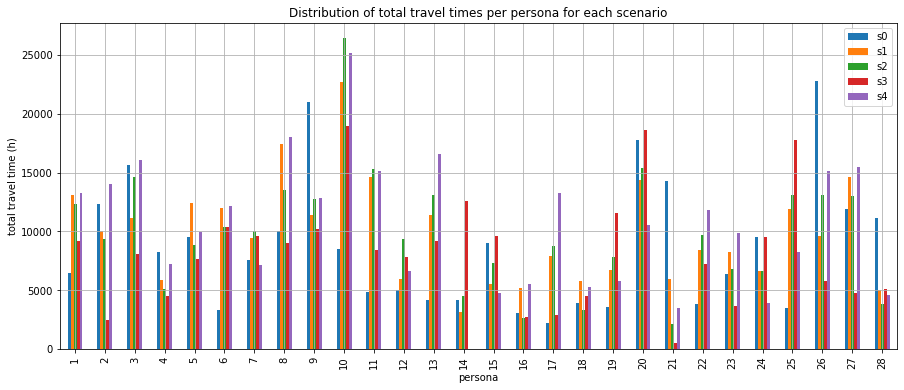

In [84]:
travel_times.plot(kind="bar", figsize=(15,6), xlabel="persona", ylabel="total travel time (h)", grid=True, title="Distribution of total travel times per persona for each scenario")
plt.show()

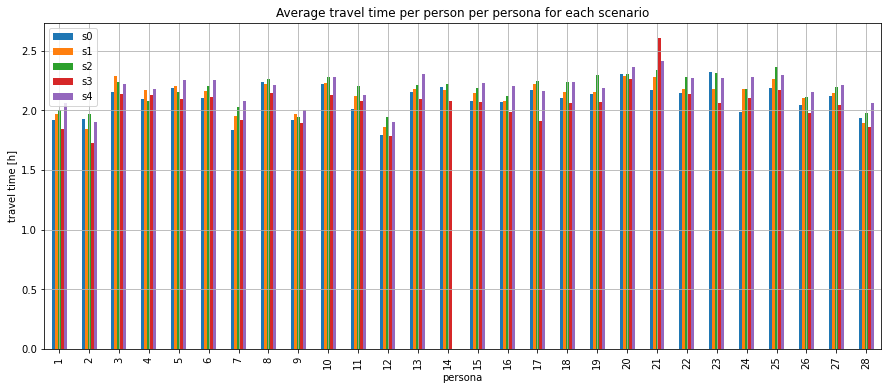

In [85]:
total_to_per_persona(travel_times, personas_counts, scenarios, personas).plot(kind="bar", figsize=(15,6), grid=True, title="Average travel time per person per persona for each scenario", xlabel="persona", ylabel="travel time [h]")
plt.show()

In [93]:
# legs_paths = {"s0":"E:\\repos\\eqasim-java-cleaned\\legs_s0.csv",
#              "s1":"E:\\repos\\eqasim-java-cleaned\\legs_s1.csv",
#              "s2":"E:\\repos\\eqasim-java-cleaned\\legs_s2.csv",
#              "s3":"E:\\repos\\eqasim-java-cleaned\\legs_s3.csv",
#              "s4":"E:\\repos\\eqasim-java-cleaned\\legs_s4.csv"}
legs_paths = {s: path.join(scenarios_outputs[s], "legs.csv") for s in scenarios}
legs_dfs = dict()
for s in scenarios:
    base_legs = pd.read_csv(legs_paths[s], sep=",")
    clustered_legs = base_legs.merge(persons[s][["person_id", "persona"]], on="person_id", how="inner")
    assert len(base_legs) == len(clustered_legs)
    legs_dfs[s] = clustered_legs

In [94]:
legs_dfs["s0"].head()

,Unnamed: 0,person_id,person_trip_id,leg_index,origin_x,origin_y,destination_x,destination_y,departure_time,travel_time,vehicle_distance,routed_distance,mode,euclidean_distance,persona
0,0,3927147,0,0,605885.157595,6.876584e+06,605885.157595,6.876584e+06,12757.0,0.0,0.000000,0.000000,walk,0.000000,28
1,10304,3927147,1,1,605885.157595,6.876584e+06,606622.636756,6.876086e+06,23557.0,924.0,0.000000,1109.117392,walk,889.806959,28
2,166200,3927147,2,2,606622.636756,6.876086e+06,632624.482358,6.867061e+06,34357.0,2764.0,31261.047193,31261.047193,car,27523.352085,28
3,228679,3927147,3,3,632624.482358,6.867061e+06,606622.636756,6.876086e+06,41557.0,2173.0,31629.733169,31629.733169,car,27523.352085,28
4,408024,3927147,4,4,606622.636756,6.876086e+06,601358.090381,6.877858e+06,59557.0,517.0,6621.651388,6621.651388,car,5554.922888,28


In [96]:
pt_legs_dfs = dict()
for s in scenarios:
    base_legs = pd.read_csv(path.join(scenarios_outputs[s], "eqasim_pt.csv"), sep=",")
    pt_legs_dfs[s] = base_legs

In [97]:
pt_legs_dfs["s0"].head()

,Unnamed: 0,person_id,person_trip_id,leg_index,access_stop_id,egress_stop_id,transit_line_id,transit_route_id,access_area_id,egress_area_id,transit_mode
0,0,1271150,0,1,StopPoint:59:7376180.link:48983,StopPoint:59:4036986.link:585002,100987783:N14,116443104-1_183707,StopArea:59631,StopArea:59566,bus
1,1,944660,0,1,StopPoint:8743315:800:N141.link:554571,StopPoint:8759118:800:N141.link:481468,800:N141,117422208-1_22633,StopArea:59435,StopArea:8711300,bus
2,2,10502677,0,1,StopPoint:59:5150728.link:506840,StopPoint:59:6783435.link:148459,100987753:N51,116441814-1_188349,StopArea:59912,StopArea:8727114,bus
3,3,6365356,0,1,StopPoint:59:4016027.link:456736,StopPoint:59:7991680.link:574981,100987782:N15,116428873-1_183751,StopArea:59:4016026,StopArea:8738400,bus
4,4,7081458,0,1,StopPoint:59:7275530.link:239769,StopPoint:59:4459238.link:646069,100987752:N52,116959084-1_188375,StopArea:59:7275530,StopArea:59443,bus


### Environmental calculation

Repeat the process below for energy demand, using energy intensity by mode

In [99]:
total_c02 = pd.DataFrame(index=list(personas), columns=scenarios)
total_c02.head()

,s0,s1,s2,s3,s4
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN


In [100]:
modes_c02 = pd.DataFrame([["car", 0.2], 
                          ["car_passenger", 0.0], 
                          ["walk", 0],
                          ["bus", 0.1],
                          ["rail", 0.007],
                          ["subway", 0.003],
                          ["tram", 0.003]], columns=["mode", "unitary_c02"])
modes_c02.head()

,mode,unitary_c02
0,car,0.200
1,car_passenger,0.000
2,walk,0.000
3,bus,0.100
4,rail,0.007


In [101]:
for s in scenarios:
    df = legs_dfs[s][legs_dfs[s]["mode"]!="pt"]
    df = df.merge(modes_c02, on="mode")
    df["total_c02"] = (df["routed_distance"]/1000) * df["unitary_c02"]
    for p in personas:
        total_c02.loc[p][s] = df[df["persona"]==p]["total_c02"].sum()

In [102]:
total_c02

,s0,s1,s2,s3,s4
1,5238.880982,10147.33894,9499.488516,7635.763346,10022.913053
2,12699.923506,10078.016361,8452.686886,2589.770387,13103.330795
3,17066.371992,12499.924093,15794.312032,9242.013971,17441.514557
4,9016.093016,6245.837825,5424.315168,4709.034331,7570.122901
5,6960.048232,9117.113673,6675.937469,6087.265315,6948.215886
6,2992.360432,10774.426619,9513.182927,10212.288952,10139.757963
7,7000.177447,8534.180151,8496.52686,9209.253245,6167.125827
8,9750.866166,16293.572046,13233.60544,9381.616961,16785.355714
9,22851.695278,11822.078512,13200.526789,11440.089641,11966.404269
10,9673.417672,24597.732362,28404.011125,22437.696463,28002.120003


In [103]:
for s in scenarios:
    df = pt_legs_dfs[s]
    total_pt_legs = len(df)
    df = df.merge(legs_dfs[s], on=["person_id", "person_trip_id", "leg_index"])
    assert(len(df[df["mode"]=="pt"]) == total_pt_legs)
    df["mode"] = df["transit_mode"]
    df = df.merge(modes_c02, on="mode", how="inner")
    df["total_c02"] = (df["routed_distance"]/1000) * df["unitary_c02"]
    for p in personas:
        total_c02.loc[p][s] += df[df["persona"]==p]["total_c02"].sum()

In [35]:
total_c02

,s0,s1,s2,s3,s4
1,6040.367022,11867.28508,11121.254358,8904.554163,11777.588283
2,14239.868901,11310.678841,9563.503101,2909.643884,14808.136274
3,18825.8341,13541.512085,17447.779062,10106.562516,19239.762585
4,9946.114422,6935.941222,6024.712207,5214.201424,8363.757913
5,8105.686579,10568.367996,7766.189051,6986.052301,8011.950391
6,3421.420053,12225.984708,10680.702534,11443.776401,11572.532361
7,7925.16582,9579.140403,9678.137577,10379.028586,7011.387982
8,10980.768332,18431.219298,14808.040393,10430.371347,18966.530564
9,25349.369671,13112.874953,14597.977955,12691.260974,13488.339553
10,10552.480272,27195.316924,31562.199486,24596.782941,30792.932405


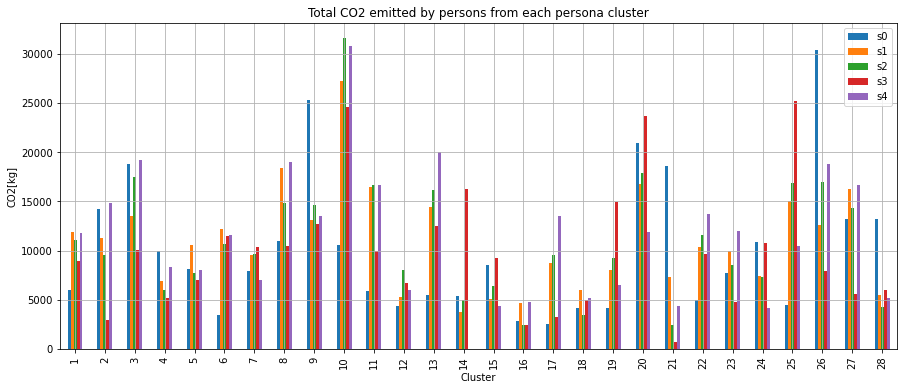

In [104]:
total_c02.plot(kind="bar", figsize=(15,6), grid=True, xlabel="Cluster", ylabel="CO2[kg]", title="Total CO2 emitted by persons from each persona cluster")
plt.show()

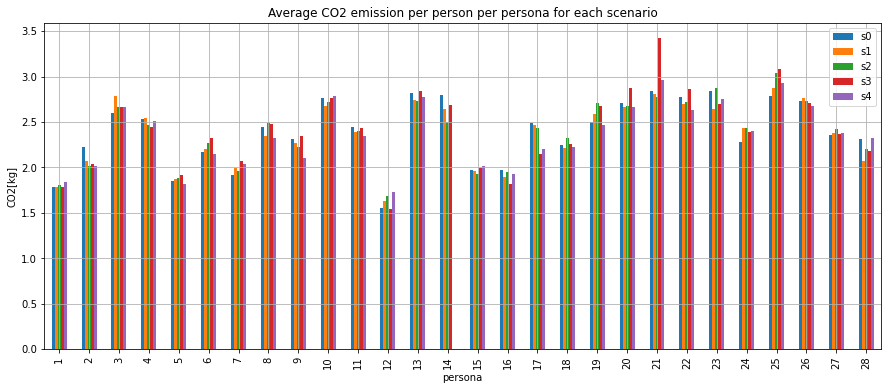

In [105]:
total_to_per_persona(total_c02, personas_counts, scenarios, personas).plot(kind="bar", figsize=(15,6), grid=True, title="Average CO2 emission per person per persona for each scenario", xlabel="persona", ylabel="CO2[kg]")
plt.show()

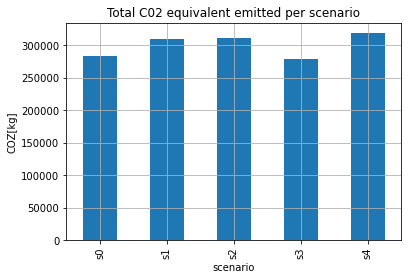

In [106]:
total_c02.sum().plot(kind="bar", grid=True, title="Total C02 equivalent emitted per scenario", xlabel="scenario", ylabel="COZ[kg]")
plt.show()